In [1]:
import pandas as pd
import numpy as num
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix




In [26]:
ortho_3=pd.read_csv('ortho_3.csv')
ortho_3

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Hernia
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Hernia
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Hernia
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Hernia
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Hernia
...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal


In [27]:
bio_ortho_3=pd.read_csv('bio_ortho_3.csv')
bio_ortho_3

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,0
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0
...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,1
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,1
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,1
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,1


In [33]:
bio_ortho_3.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt               310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    int64  
dtypes: float64(6), int64(1)
memory usage: 17.1 KB


In [28]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [29]:
X = bio_ortho_3.drop('class', axis=1)
y = bio_ortho_3['class']

In [30]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
# Initialize optimized XGBoost model
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', 
                    n_estimators=50, max_depth=3, random_state=42)

In [32]:
# Train the model
xgb.fit(X_train, y_train)

# Predict and evaluate
y_pred = xgb.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.58      0.58        12
           1       0.76      0.72      0.74        18
           2       0.97      1.00      0.98        32

    accuracy                           0.84        62
   macro avg       0.77      0.77      0.77        62
weighted avg       0.84      0.84      0.84        62

Confusion Matrix:
 [[ 7  4  1]
 [ 5 13  0]
 [ 0  0 32]]


c:\Users\FAST COMPUTER\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:59:05] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


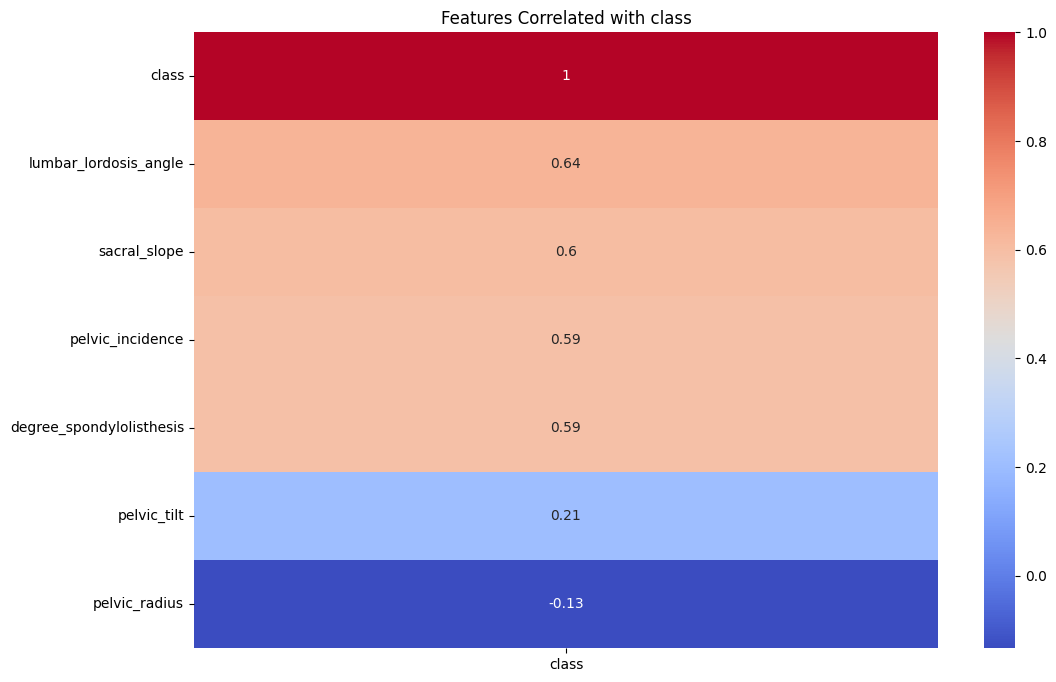

In [34]:
corr = bio_ortho_3.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr[['class']].sort_values(by='class', ascending=False), annot=True, cmap='coolwarm')
plt.title("Features Correlated with class")
plt.show()

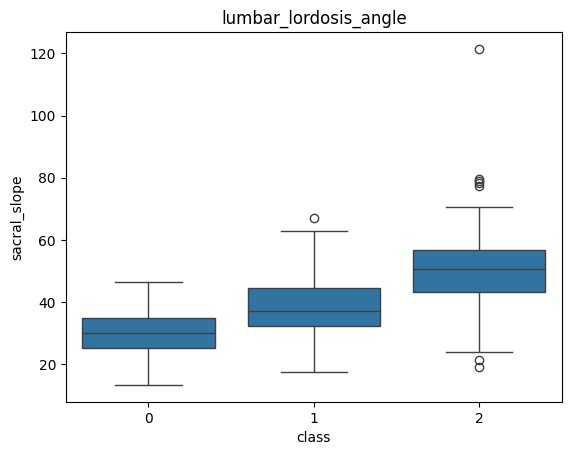

In [35]:
sns.boxplot(x='class', y='sacral_slope', data=bio_ortho_3)
plt.title('lumbar_lordosis_angle')
plt.show()

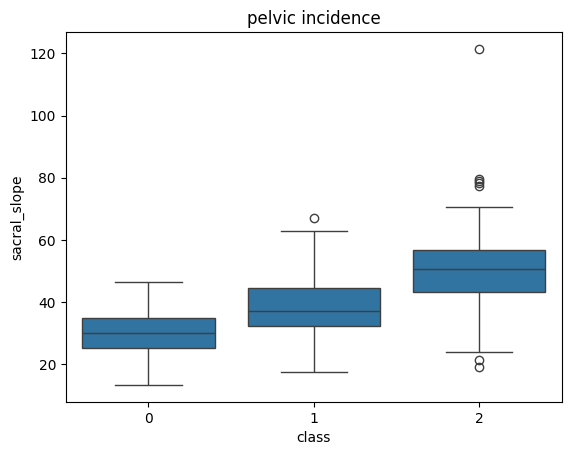

In [36]:
sns.boxplot(x='class', y='sacral_slope', data=bio_ortho_3)
plt.title('pelvic incidence')
plt.show()

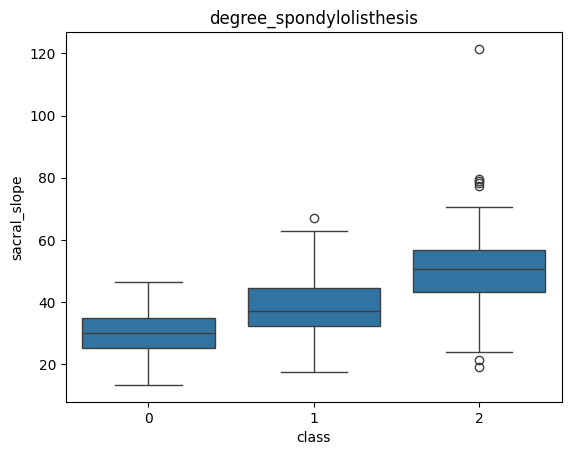

In [37]:
sns.boxplot(x='class', y='sacral_slope', data=bio_ortho_3)
plt.title('degree_spondylolisthesis')
plt.show()